# TechnoHacks Task 3

# Diabetes Prediction

### Import Libraries

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense

### Read Data

In [3]:
df = pd.read_csv('/kaggle/input/pima-indians-diabetes-database/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Visualize Our Data

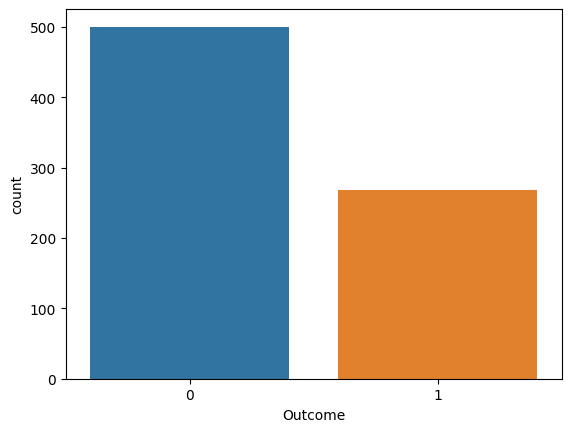

In [11]:
sns.countplot(data=df, x='Outcome')
plt.show()

### Fix Skew Data problem

In [25]:
positive_samples = df[df['Outcome'] == 1]
negative_samples = df[df['Outcome'] == 0]
num_sample = len(negative_samples) - len(positive_samples)

In [30]:
df = pd.concat([df, positive_samples.sample(num_sample, replace=True)], ignore_index=True)

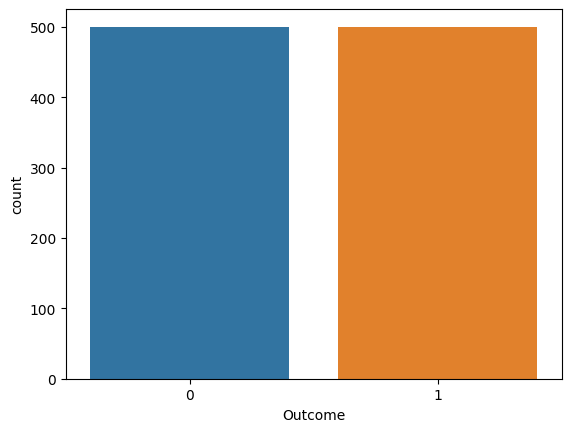

In [34]:
sns.countplot(data=df, x='Outcome')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


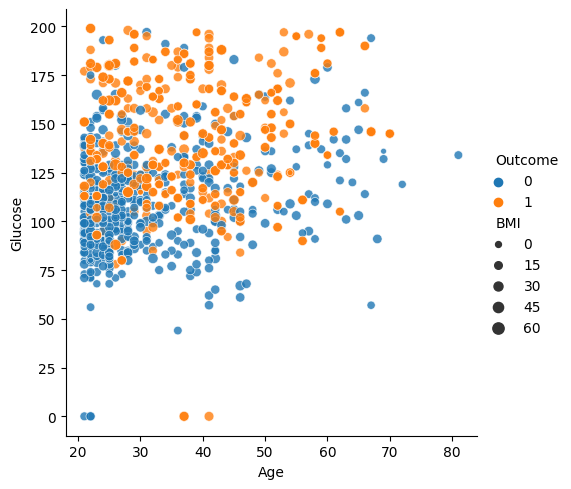

In [50]:
sns.relplot(data=df, x='Age', y='Glucose', hue='Outcome', size=df['BMI'], alpha=0.8)
plt.show()

### Split Data

In [35]:
x = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [36]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [37]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

In [38]:
x_train.shape, y_train.shape

((800, 8), (800,))

### Create, Train and Evaluate Model

In [162]:
epochs = 50
batch_size = 32
loss = keras.losses.BinaryCrossentropy()
optimizer = 'adam'
metrics = ['accuracy', keras.metrics.Recall(), keras.metrics.Precision()]

In [163]:
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(8,)))
model.add(Dense(1, activation='sigmoid'))

In [164]:
model.compile(optimizer=optimizer, loss=loss, metrics=metrics)
model.summary()

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_69 (Dense)            (None, 128)               1152      
                                                                 
 dense_70 (Dense)            (None, 1)                 129       
                                                                 
Total params: 1,281
Trainable params: 1,281
Non-trainable params: 0
_________________________________________________________________


In [165]:
history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2)

Epoch 1/50
20/20 [==============================] - 1s 18ms/step - loss: 0.6981 - accuracy: 0.5437 - recall_20: 0.3994 - precision_20: 0.5570 - val_loss: 0.6455 - val_accuracy: 0.6375 - val_recall_20: 0.5679 - val_precision_20: 0.6667
Epoch 2/50
20/20 [==============================] - 0s 4ms/step - loss: 0.5895 - accuracy: 0.7328 - recall_20: 0.7296 - precision_20: 0.7319 - val_loss: 0.5709 - val_accuracy: 0.7188 - val_recall_20: 0.7654 - val_precision_20: 0.7045
Epoch 3/50
20/20 [==============================] - 0s 4ms/step - loss: 0.5365 - accuracy: 0.7312 - recall_20: 0.7704 - precision_20: 0.7122 - val_loss: 0.5361 - val_accuracy: 0.7437 - val_recall_20: 0.8025 - val_precision_20: 0.7222
Epoch 4/50
20/20 [==============================] - 0s 5ms/step - loss: 0.5080 - accuracy: 0.7609 - recall_20: 0.7987 - precision_20: 0.7405 - val_loss: 0.5196 - val_accuracy: 0.7500 - val_recall_20: 0.7654 - val_precision_20: 0.7470
Epoch 5/50
20/20 [==============================] - 0s 4ms/step

In [166]:
model.evaluate(x_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.4951 - accuracy: 0.7750 - recall_20: 0.8119 - precision_20: 0.7593


[0.4950783848762512,
 0.7749999761581421,
 0.8118811845779419,
 0.7592592835426331]

### Training Plots

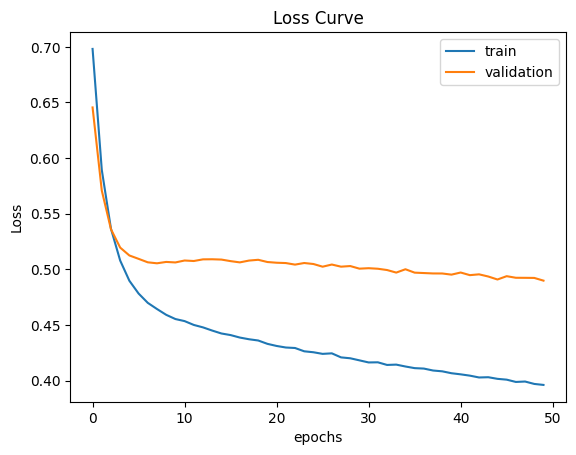

In [167]:
plt.plot(range(epochs), history.history['loss'], label='train')
plt.plot(range(epochs), history.history['val_loss'], label='validation')
plt.title('Loss Curve')
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

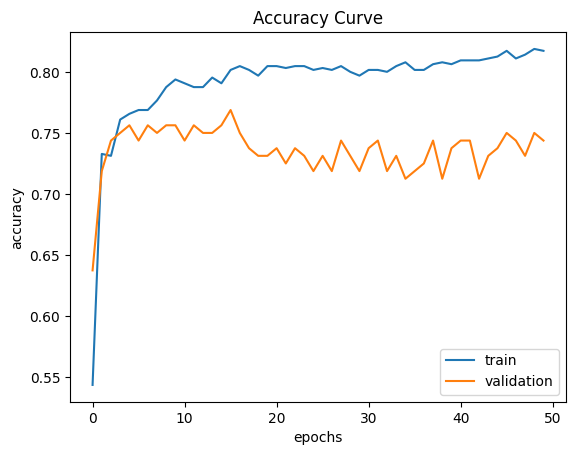

In [168]:
plt.plot(range(epochs), history.history['accuracy'], label='train')
plt.plot(range(epochs), history.history['val_accuracy'], label='validation')
plt.title('Accuracy Curve')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(loc='lower right')
plt.show()